# What is SURF Alogrithm?

1. The SURF method (Speeded Up Robust Features) is a fast and robust algorithm for local, similarity invariant representation and comparison of images. 
2. The main interest of the SURF approach lies in its fast computation of operators using box filters, thus enabling real-time applications such as tracking and object recognition. 

## SURF is composed of 2 steps
1. **Feature Extraction**
2. **Feature Description**

In [24]:
! pip install opencv-python==3.4.2.17

     |████████████████████████████████| 25.0MB 4.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [13]:
! pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6MB 144kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


## Importing dependencies

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Loading the train image

In [2]:
IMAGE_PATH = './images/img.jpg'

img = cv2.imread(IMAGE_PATH)

In [3]:
# convert the training image to RGB
training_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
# convert the training image to Gray Scale
training_gray = cv2.cvtColor(training_img, cv2.COLOR_RGB2GRAY)

## Creating test image

In [5]:
# add scale invariance 
test_img = cv2.pyrDown(training_img)
test_img = cv2.pyrDown(test_img)

num_rows, num_cols = test_img.shape[:2]
print(f'No of rows : {num_rows} and No of columns : {num_cols}')

No of rows : 409 and No of columns : 409


In [6]:
# add rotational invariance
rotational_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)

In [7]:
# applying rotational matrix on the test image
test_img = cv2.warpAffine(test_img, rotational_matrix, (num_cols, num_rows))

In [8]:
# covert the test image to Gray Scale
test_gray = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

## Display the train and test images


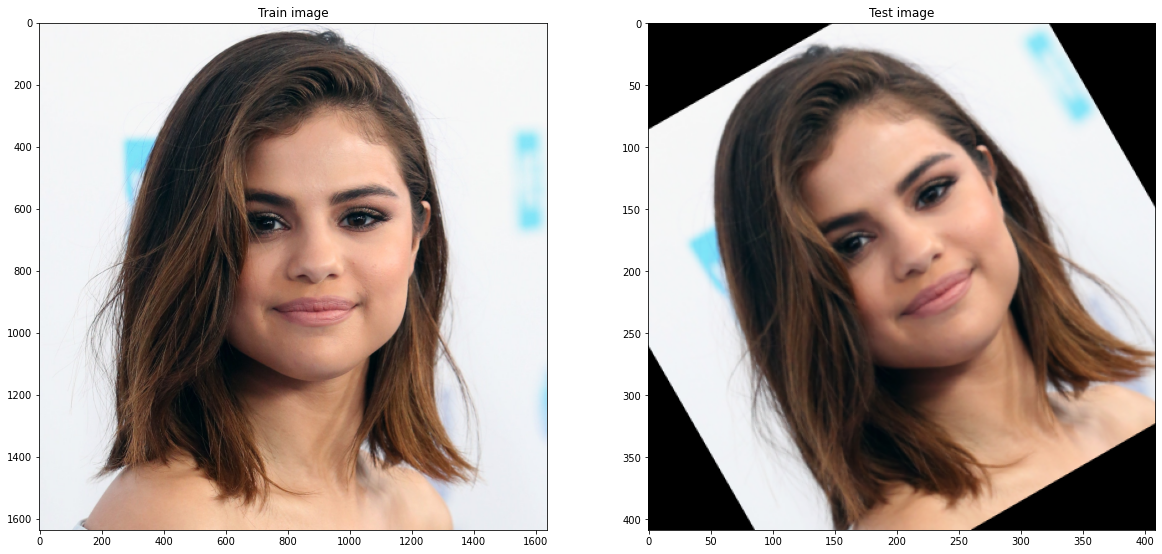

In [9]:
fx, plots = plt.subplots(1, 2, figsize = (20, 10))

plots[0].set_title('Train image')
plots[0].imshow(training_img)

plots[1].set_title('Test image')
plots[1].imshow(test_img)

## Step 1: To detect keypoints and create a descriptor

In [10]:
# loading SURF algorithm
surf = cv2.xfeatures2d.SURF_create(800)

In [11]:
# finding the keypoints
train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = surf.detectAndCompute(test_gray, None)

In [12]:
# saving a copy of keypoints for plotting
keypoints_without_size = np.copy(training_img)
keypoints_with_size = np.copy(training_img)

In [14]:
cv2.drawKeypoints(training_img, train_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(training_img, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[245, 247, 246],
        [245, 247, 246],
        [245, 247, 246],
        ...,
        [246, 248, 247],
        [246, 248, 247],
        [246, 248, 247]],

       [[245, 247, 246],
        [245, 247, 246],
        [245, 247, 246],
        ...,
        [246, 248, 247],
        [246, 248, 247],
        [246, 248, 247]],

       [[245, 247, 246],
        [245, 247, 246],
        [245, 247, 246],
        ...,
        [246, 248, 247],
        [246, 248, 247],
        [246, 248, 247]],

       ...,

       [[236, 236, 244],
        [236, 236, 244],
        [236, 236, 244],
        ...,
        [233, 243, 245],
        [234, 242, 245],
        [234, 242, 245]],

       [[236, 236, 244],
        [236, 236, 244],
        [236, 236, 244],
        ...,
        [233, 243, 245],
        [234, 242, 245],
        [234, 242, 245]],

       [[236, 236, 244],
        [236, 236, 244],
        [236, 236, 244],
        ...,
        [233, 243, 245],
        [234, 242, 245],
        [234, 242, 245]]

## Display image with and without keypoints size

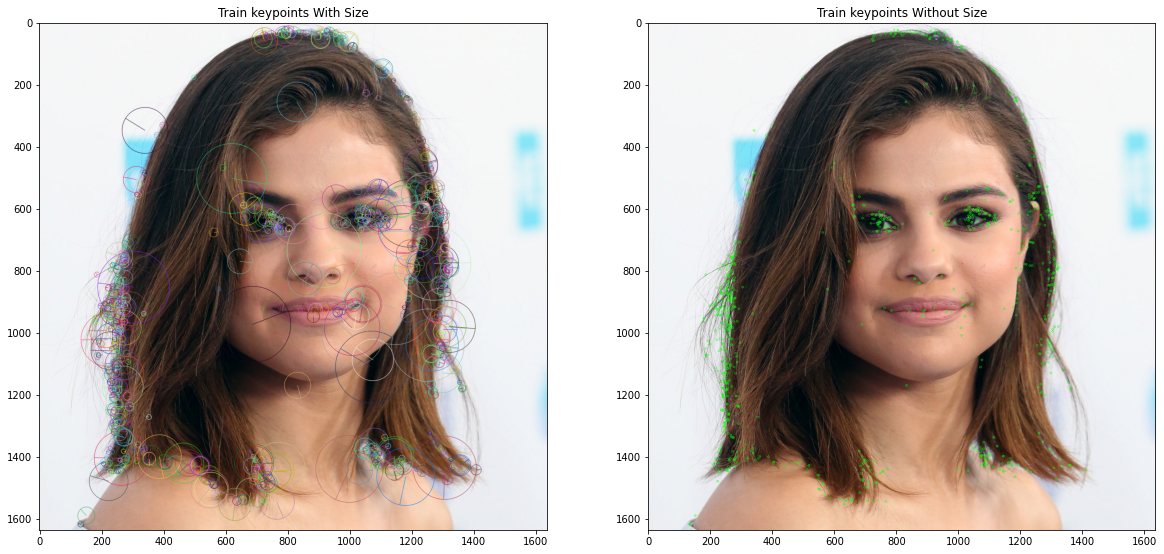

In [15]:
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')


In [24]:
# Print the number of keypoints detected in the training and test image
print(f"No of Keypoints Detected In The Training Image: {len(train_keypoints)}")

print(f"No of Keypoints Detected In The Test Image: {len(test_keypoints)}")

No of Keypoints Detected In The Training Image: 863
No of Keypoints Detected In The Test Image: 128


## Step 2 : Matching keypoints

In [25]:
# Create a Brute Force Matcher object.
bf_matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

In [26]:
# Perform the matching between the SURF descriptors of the training image and the test image
matches = bf_matcher.match(train_descriptor, test_descriptor)

In [27]:
# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

In [21]:
result = cv2.drawMatches(training_img, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

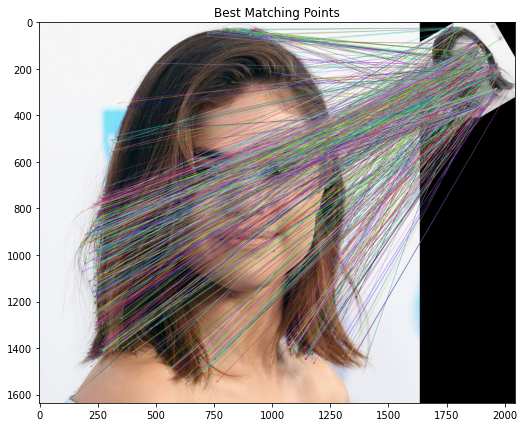

In [28]:
# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

In [29]:
# Print total number of matching points between the training and query images
print(f"Number of Matching Keypoints Between The Training and Test Image: {len(matches)}")

Number of Matching Keypoints Between The Training and Test Image:  863
